# Street Lights in Boston

### Summary
Exploratory Data Analysis (EDA) on street lights location in the City of Boston.  In addition, a function is provided to determine the numbers of lights in a radius given a lat and long.

- Data downloaded from (https://data.boston.gov/dataset/streetlight-locations)


In [ ]:
import itertools
import os
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

In [2]:
DATA_ROOT = '../data/'
FIGURES_ROOT = '../figures/streetlights'
DATA_DIR = os.path.join(DATA_ROOT, 'raw/boston')
SHAPE_DIR = os.path.join(DATA_ROOT, 'raw/shapefile')
WRITE_DIR = os.path.join(DATA_ROOT, 'interim/streetlights')
readfile_sam = os.path.join(DATA_DIR, 'sam-addresses.csv')
readfile_streets = os.path.join(SHAPE_DIR, 'street-segments/Boston_Street_Segments.shp')
readfile_boston = os.path.join(SHAPE_DIR, 'city-boundary/City_of_Boston_Boundary.shp')

print('{}\n{}\n{}\n{}\n'.format(readfile_sam, readfile_streets, readfile_boston, WRITE_DIR))

../data/raw/boston\sam-addresses.csv
../data/raw/shapefile\street-segments/Boston_Street_Segments.shp
../data/raw/shapefile\city-boundary/City_of_Boston_Boundary.shp
../data/interim/streetlights



In [3]:
# mkdir for writing new data if it doesn't already exist
if not os.path.exists(WRITE_DIR):
    os.mkdir(WRITE_DIR)

# mkdir for saving figures if it doesn't already exist
if not os.path.exists(FIGURES_ROOT):
    os.mkdir(FIGURES_ROOT)

In [ ]:
gdf_streets = gpd.read_file(readfile_streets)
gdf_boston = gpd.read_file(readfile_boston)

In [5]:
# load data from csv file
df_lights = pd.read_csv('../data/processed/streetlight-locations.csv')

# quick eda of the dataframe
print("Lights Dataframe Shape:", df_lights.shape)
print()
print("Lights Dataframe Head:") 
display(df_lights.head())
print()
print("Lights Dataframe Description:")
display(df_lights.describe())
print()
print("Lights Dataframe Information:")
display(df_lights.info())

Lights Dataframe Shape: (74065, 6)

Lights Dataframe Head:


,the_geom,OBJECTID,TYPE,Lat,Long,Location
0,POINT (-71.0760443807948 42.35315925057316),1,LIGHT,42.353159,-71.076044,"(42.3531592506, -71.0760443808)"
1,POINT (-71.07538171240694 42.353347768071195),2,LIGHT,42.353348,-71.075382,"(42.3533477681, -71.0753817124)"
2,POINT (-71.07477488057383 42.35352052068278),3,LIGHT,42.353521,-71.074775,"(42.3535205207, -71.0747748806)"
3,POINT (-71.07440373484715 42.3535558201314),4,LIGHT,42.353556,-71.074404,"(42.3535558201, -71.0744037348)"
4,POINT (-71.07362079549182 42.35381056415504),5,LIGHT,42.353811,-71.073621,"(42.3538105642, -71.0736207955)"



Lights Dataframe Description:


,OBJECTID,Lat,Long
count,74065.000000,74065.000000,74065.000000
mean,37033.000000,42.330993,-71.080297
std,21380.868181,0.031495,0.035254
min,1.000000,42.232589,-71.183561
25%,18517.000000,42.308773,-71.099727
50%,37033.000000,42.335927,-71.074150
75%,55549.000000,42.353736,-71.056993
max,74065.000000,42.396182,-70.929731



Lights Dataframe Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74065 entries, 0 to 74064
Data columns (total 6 columns):
the_geom    74065 non-null object
OBJECTID    74065 non-null int64
TYPE        74026 non-null object
Lat         74065 non-null float64
Long        74065 non-null float64
Location    74065 non-null object
dtypes: float64(2), int64(1), object(3)
memory usage: 3.4+ MB


None

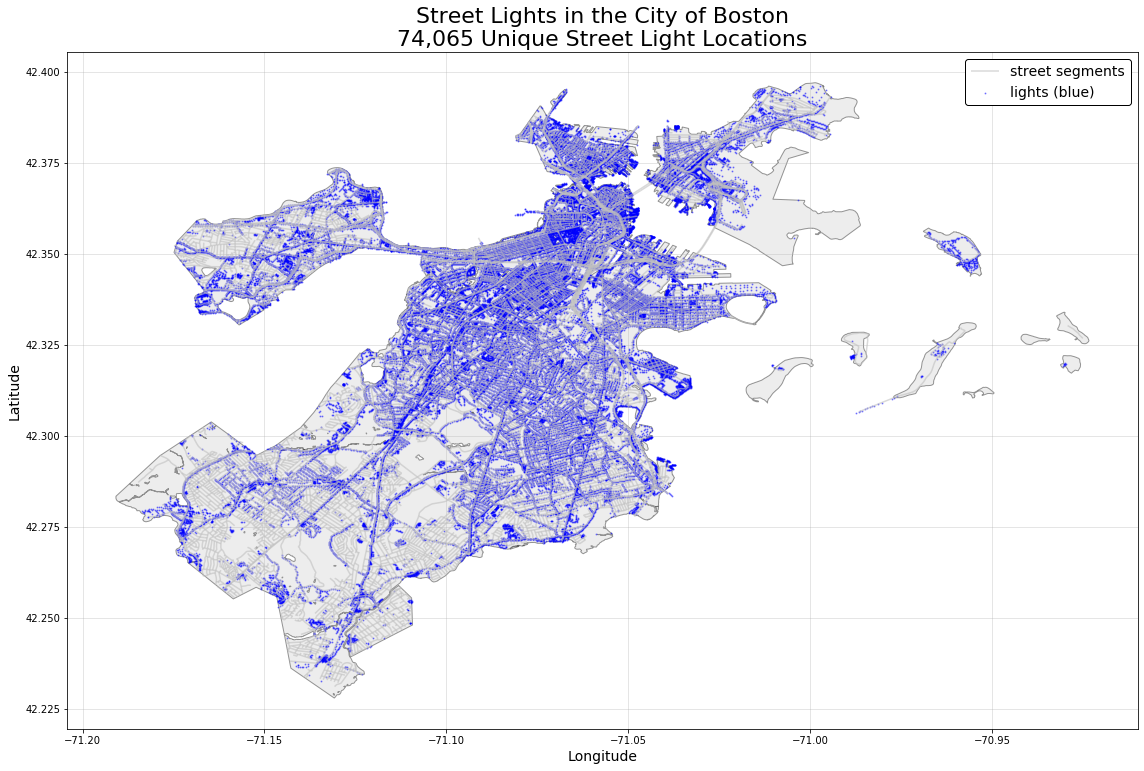

Wall time: 5.65 s


In [6]:
%%time
savefig=True

# plot unique SAM records with city boundary and street segments overlays 
fig, ax = plt.subplots(figsize=(16,11))
gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
gdf_streets.plot(ax=ax, color='silver', edgecolor='k', alpha=.6, label='street segments')
plt.title(
    'Street Lights in the City of Boston\n'\
    '{:,} Unique Street Light Locations'.format(
        len(df_lights)
    ),
    fontsize=22
)
plt.scatter(df_lights['Long'], df_lights['Lat'], alpha=0.4, color="blue", s=1, label='lights (blue)')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.grid(":", alpha=0.4)
plt.legend(edgecolor='k', framealpha=1, fontsize=14)
plt.tight_layout()
if savefig:
    plt.savefig(os.path.join(FIGURES_ROOT, 'street-lights_overall.png'))
plt.show();

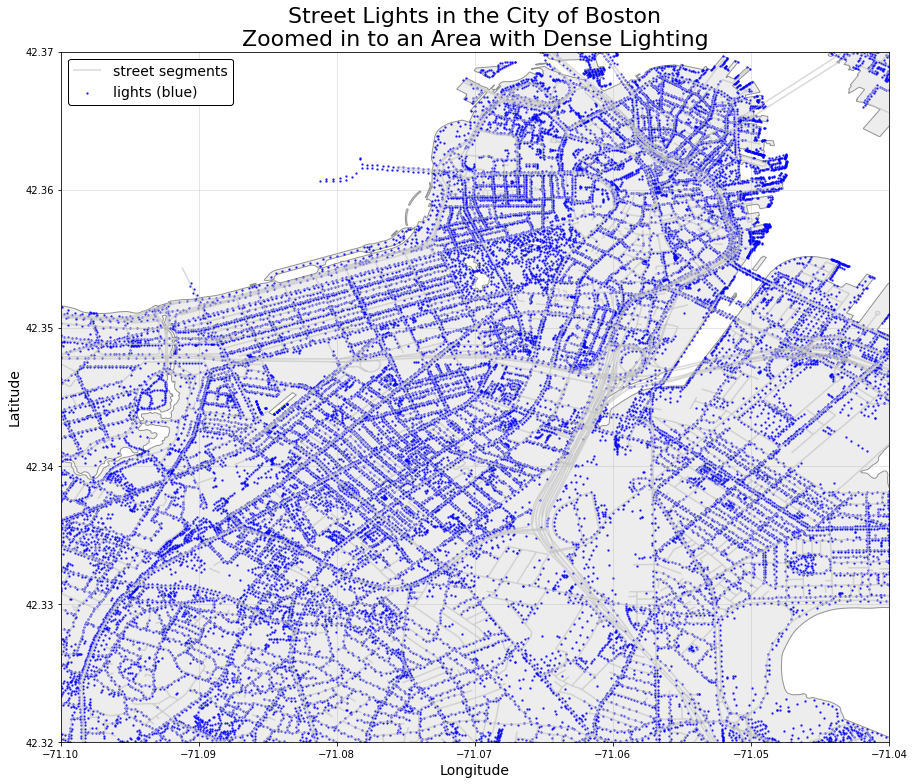

Wall time: 11.7 s


In [7]:
%%time
savefig=True

# plot unique SAM records with city boundary and street segments overlays 
fig, ax = plt.subplots(figsize=(16,11))
gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
gdf_streets.plot(ax=ax, color='silver', edgecolor='k', alpha=.6, label='street segments')
plt.title(
    'Street Lights in the City of Boston\n'\
    'Zoomed in to an Area with Dense Lighting', fontsize=22
)
plt.scatter(df_lights['Long'], df_lights['Lat'], alpha=0.7, color="blue", s=2, label='lights (blue)')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xlim(left=-71.10, right=-71.04)
plt.ylim(bottom=42.32, top=42.37)
plt.grid(":", alpha=0.4)
plt.legend(edgecolor='k', framealpha=1, fontsize=14)
plt.tight_layout()
if savefig:
    plt.savefig(os.path.join(FIGURES_ROOT, 'street-lights_dense.png'))
plt.show();

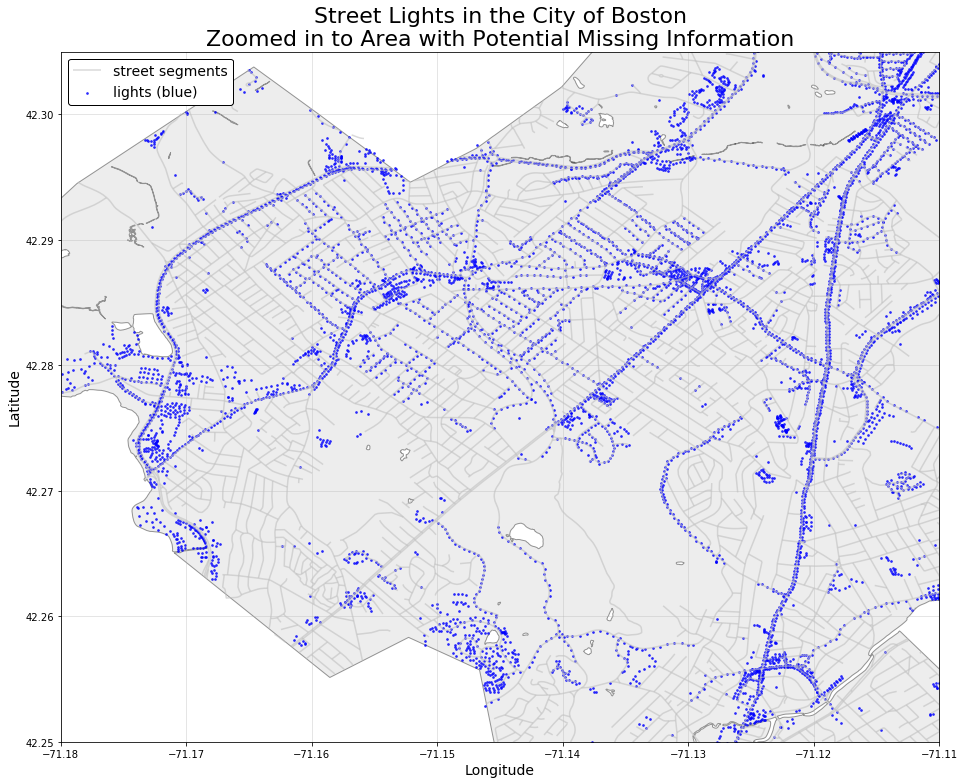

Wall time: 11.6 s
Compiler : 188 ms


In [8]:
%%time
savefig=True

# plot unique SAM records with city boundary and street segments overlays 
fig, ax = plt.subplots(figsize=(16,11))
gdf_boston.plot(ax=ax, color='lightgray', edgecolor='k', alpha=0.4)
gdf_streets.plot(ax=ax, color='silver', edgecolor='k', alpha=.6, label='street segments')
plt.title(
    'Street Lights in the City of Boston\n'\
    'Zoomed in to Area with Potential Missing Information', fontsize=22
)
plt.scatter(df_lights['Long'], df_lights['Lat'], alpha=0.7, color="blue", s=3, label='lights (blue)')
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.xlim(left=-71.18, right=-71.11)
plt.ylim(bottom=42.250, top=42.305)
plt.grid(":", alpha=0.4)
plt.legend(edgecolor='k', framealpha=1, fontsize=14)
plt.tight_layout()
if savefig:
    plt.savefig(os.path.join(FIGURES_ROOT, 'street-lights_missing.png'))
plt.show();

### Insights

The lower-left corner of the map has no lights except for major roads.  We are unsure as to whether this is the ground truth or if the dataset is incomplete.   Google street view appears to show street lights on streets in 02132 (West Roxbury) where the dataset indicates there are none.

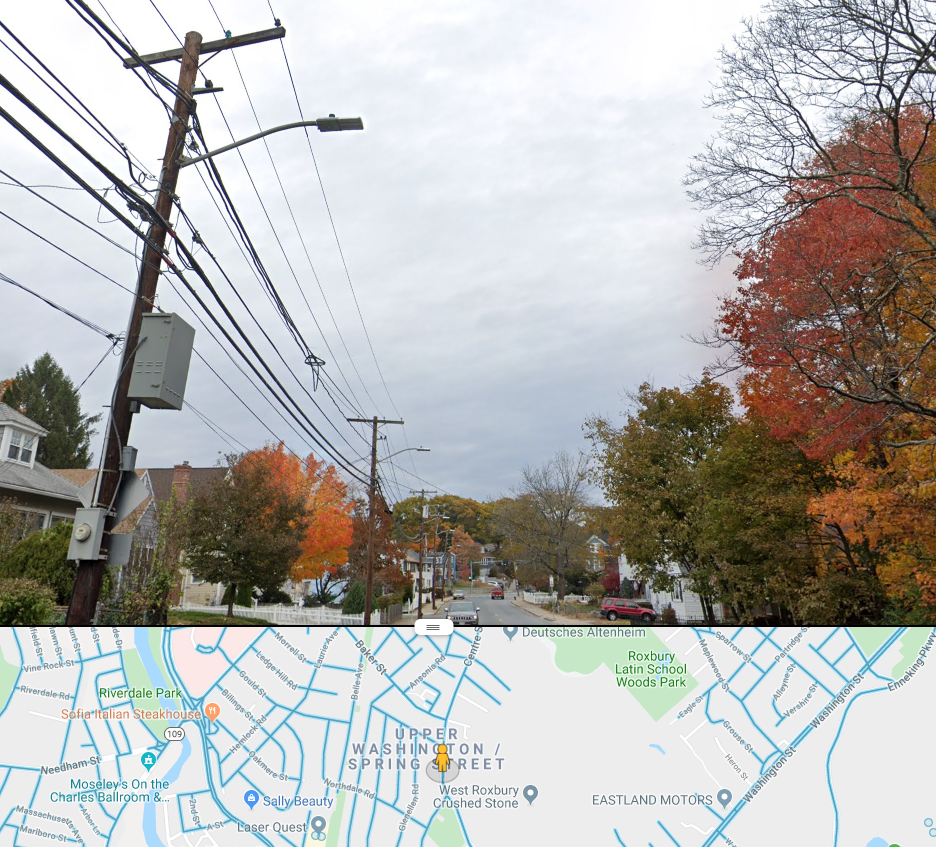

In [9]:
from IPython.display import Image
Image(filename='../figures/streetlights/street-lights_present-01.png') 

#### Notes:

All crime occurs all over the city so will have a near perfect overlap with lights.  Looking at one type of serious crime may be more informative.

Create density heatmap?

### Distance function between two points

In [6]:
from math import cos, asin, sqrt

# function modified from (https://stackoverflow.com/questions/365826)
def distance(lat1, lon1, lat2, lon2):
    """
    Calculate distance in meters given two input gps coordinates
    """
    p = 0.017453292519943295
    a = 0.5 - cos((lat2-lat1)*p)/2 + cos(lat1*p)*cos(lat2*p)*(1-cos((lon2-lon1)*p))/2
    
    return (12742 * asin(sqrt(a))) * 1000

In [7]:
# distance test Widener to Boston City Hall Plaza (checked with Google Maps Measurement Tool)
distance (42.373392, -71.116507, 42.360126, -71.059320)

4924.382348283845

### Import crime dataframe

In [8]:
df_crime = pd.read_csv('../data/processed/crime-model-data-v1.csv')

In [29]:
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151072 entries, 0 to 151071
Data columns (total 29 columns):
crime-type                           151072 non-null object
INCIDENT_NUMBER                      151072 non-null object
OFFENSE_DESCRIPTION                  151072 non-null object
timestamp                            151072 non-null object
lat                                  151072 non-null float64
lon                                  151072 non-null float64
year                                 151072 non-null int64
month                                151072 non-null int64
day-of-week                          151072 non-null object
hour                                 151072 non-null int64
ZIP5                                 151044 non-null float64
ZIP5_area                            151044 non-null float64
Name                                 151002 non-null object
Neighborhood_area                    151002 non-null float64
Neighborhood_area_2                  151002 non

### Calculate number of lights within a threshold of meters for each crime

##### First pass for a function

In [12]:
def coord_density(df1, df2, threshold):
    """
    
    """
    light_density = []
    
    for i in range(20):#(df1.shape[0]):
        lat1 = df1['lat'][i]
        lon1 = df1['lon'][i]
        counter = 0
        for j in range(df2.shape[0]):
            lat2 = df2['Lat'][j]
            lon2 = df2['Long'][j]
            dist = distance(lat1, lon1, lat2, lon2)
            if dist < threshold:
                counter += 1
        light_density.append(counter)
            
    return light_density

In [13]:
%%time
# only first 20 rows
lights_and_crimes = coord_density(df_crime, df_lights, 100)

Wall time: 30.8 s


In [14]:
print(lights_and_crimes)

[7, 8, 26, 77, 17, 17, 40, 1, 21, 15, 43, 13, 53, 33, 49, 59, 1, 33, 36, 5]


##### Second pass using numpy (25x faster)

In [30]:
def coord_density_np(df1, df2, threshold):
    """
    
    """
    lats1 = np.array(df1['lat'].values)
    lons1 = np.array(df1['lon'].values)
    lats2 = np.array(df2['Lat'].values)
    lons2 = np.array(df2['Long'].values)
    light_density = []
    
    for i in range(df1.shape[0]):
        lat1 = lats1[i]
        lon1 = lons1[i]
        counter = 0
        for j in range(df2.shape[0]):
            lat2 = lats2[j]
            lon2 = lons2[j]
            dist = distance(lat1, lon1, lat2, lon2)
            if dist < threshold:
                counter += 1
        light_density.append(counter)
            
    return light_density

In [31]:
%%time
# calculate the number of lights in 100m of the entire crime dataframe
lights_and_crimes_np = coord_density_np(df_crime, df_lights, 100)

Wall time: 6h 27min 24s


In [33]:
light_density = pd.DataFrame(data=lights_and_crimes_np, 
                             columns=['light-density'])

In [36]:
light_density.shape

(151072, 1)

In [34]:
light_density.head()

,light-density
0,7
1,8
2,26
3,77
4,17


In [40]:
light_density.describe()

,light-density
count,151072.000000
mean,35.116964
std,21.676556
min,0.000000
25%,20.000000
50%,33.000000
75%,49.000000
max,151.000000


In [35]:
light_density.to_csv('../data/processed/light_density.csv')

### Add light density information to crime dataframe

In [37]:
crime_model_data = pd.concat([df_crime, light_density], axis=1)

In [38]:
crime_model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151072 entries, 0 to 151071
Data columns (total 30 columns):
crime-type                           151072 non-null object
INCIDENT_NUMBER                      151072 non-null object
OFFENSE_DESCRIPTION                  151072 non-null object
timestamp                            151072 non-null object
lat                                  151072 non-null float64
lon                                  151072 non-null float64
year                                 151072 non-null int64
month                                151072 non-null int64
day-of-week                          151072 non-null object
hour                                 151072 non-null int64
ZIP5                                 151044 non-null float64
ZIP5_area                            151044 non-null float64
Name                                 151002 non-null object
Neighborhood_area                    151002 non-null float64
Neighborhood_area_2                  151002 non

In [39]:
crime_model_data.head()

,crime-type,INCIDENT_NUMBER,OFFENSE_DESCRIPTION,timestamp,lat,lon,year,month,day-of-week,hour,...,industrial-mix-ratio,owner-occupied-ratio,residential-median-value,residential-gini-coef,industrial-mix-ratio-3yr-cagr,commercial-mix-ratio-3yr-cagr,owner-occupied-ratio-3yr-cagr,residential-median-value-3yr-cagr,residential-gini-coef-3yr-cagr,light-density
0,fraud,I192078177,forgery / counterfeiting,2019-08-01 17:46:00,42.304922,-71.102981,2019,8,Thursday,17,...,0.000294,0.000000,756500.0,0.000000,-0.034814,0.000000,0.000000,0.024264,0.000000,7
1,harassment-disturbance,I192078061,harassment,2019-06-12 21:00:00,42.355553,-71.152747,2019,6,Wednesday,21,...,0.000000,0.550355,745950.0,0.199606,0.000000,-0.010424,-0.028224,0.068142,0.011166,8
2,theft,I192078038,larceny theft of mv parts & accessories,2019-03-10 8:00:00,42.345625,-71.041291,2019,3,Sunday,8,...,0.000938,0.456287,538500.0,0.228793,-0.084828,0.010549,-0.014131,0.060340,0.018436,26
3,theft,I192078015,larceny all others,2019-07-08 10:29:00,42.339304,-71.051604,2019,7,Monday,10,...,0.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,77
4,theft,I192077997,auto theft - leased/rented vehicle,2019-04-13 8:00:00,42.328564,-71.068353,2019,4,Saturday,8,...,0.076862,0.460751,355500.0,0.172898,0.060168,-0.007779,-0.023444,0.082123,0.025972,17


In [41]:
crime_model_data.to_csv('../data/processed/crime-model-data-v2.csv')